<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML/DL/11%EC%9B%94%2030%EC%9D%BC/11%EC%9B%94_30%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ozone.csv 파일을 활용한 머신러닝 모델 구현하기
- python, tensorflow, sklearn 3가지 모두 구현할 예정

In [ ]:
# Simple(독립변수 1개) Linear Regression을 구현해 보아요!
# 사용하는 데이터는 ozone 데이터를 사용 할 거에요
# 태양광세기, 바람, 온도를 기반으로 ozone량이 결정되는데
# 이걸 측정한 데이터

In [ ]:
# Python 직접 구현

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]
training_data

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    - 지금은 그냥 냅다 삭제할 거에요!(데이터가 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)  # 어떤 값을 설정해야 하는지 모르기 때문에 처음에는 랜덤 값을 받는다
b = np.random.rand(1)

# loss function -> W와 b 값에 의해 결정되는 함수이므로 W,b가 들어와야 함
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data,input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):
    return np.dot(x, W) + b

# learning rate 정의(hyperparameter -> 내가 정하는 것)
learning_rate = 1e-4  # 1e-4 -> learning_rate 설정하는 기준

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')



W : [[0.48111678]], b : [0.52651291], loss : 1618.4642246186775
W : [[0.71720735]], b : [-11.75996666], loss : 817.7979858573912
W : [[0.85976141]], b : [-23.0240147], loss : 775.4714453116663
W : [[0.99044184]], b : [-33.34985675], loss : 739.9021925668077
W : [[1.11023763]], b : [-42.81563794], loss : 710.0114496751615
W : [[1.22005538]], b : [-51.49299454], loss : 684.8926619110267
W : [[1.32072618]], b : [-59.44759606], loss : 663.7840029183634
W : [[1.4130119]], b : [-66.73964228], loss : 646.0452693197066
W : [[1.49761095]], b : [-73.42431881], loss : 631.1384640227403
W : [[1.57516357]], b : [-79.55221472], loss : 618.6114793354693


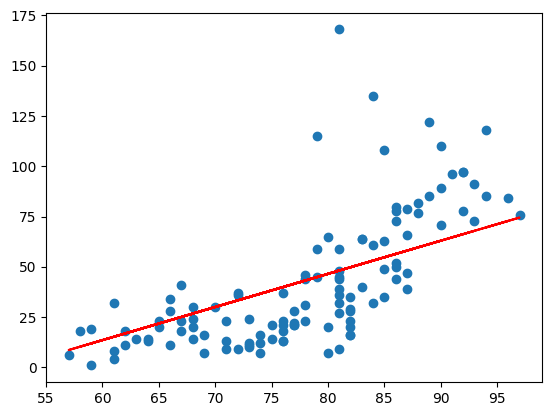

In [ ]:
# 학습종료 후 예측
# 온도가 62도일 때, ozone량은 얼마?
predict(np.array([[62]]))  # 2차원 배열 형태로 값이 들어가야 하기 때문
# 근데 이거 맞는거야??
# 그래프로 확인해보아요!
# (독립변수 1개니까 2차원 평면에 모델을 그릴 수 있어요)

# 데이터를 2차원 평면에 찍어보아요
plt.scatter(x_data,t_data)

# 우리 Model을 그려보아요
plt.plot(x_data, x_data*W.ravel() + b, color='r')  # ravel한 이유 -> W가 2차원이고 x_data는 1차원이기 때문

In [ ]:
# 같은 내용을 이제 Tensorflow Keras를 이용해서 구현!

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]
training_data

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    - 지금은 그냥 냅다 삭제할 거에요!(데이터가 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model 만들기
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# Model
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

In [ ]:
#
model.predict(np.array([[62]]))

weight, bias = output_layer.get_weights()
plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*weight + bias, color='r')

1/1 [==============================] - 0s 102ms/step


array([[35.891037]], dtype=float32)

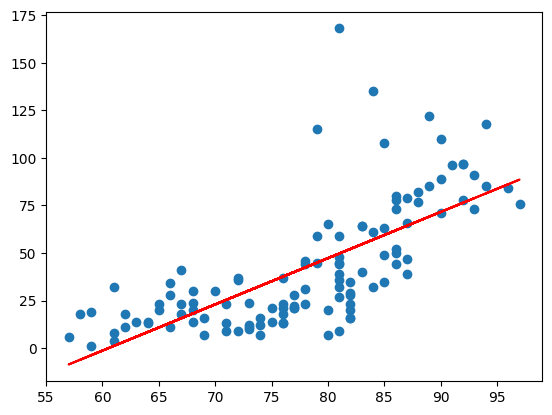

In [ ]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')

training_data = df[['Temp','Ozone']]

# 이렇게 데이터를 가져온 후 당연히 데이터 전처리를 해야 해요!
# 1. 결측치 처리!
#    - 지금은 그냥 냅다 삭제할 거에요!(데이터가 많은 경우 가장 좋은 방법)
training_data = training_data.dropna(how='any')
training_data

# Traingin DataSet 준비
x_data = training_data['Temp'].values.reshape(-1,1)  #(-1.1) -> 1개의 열 가지고 있고 나머지는 모두 행으로 ㄱㄱ
t_data = training_data['Ozone'].values.reshape(-1,1)

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야 그래프 그릴 수 있겠죠
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

# 예측을 해보아요!
sklearn_model.predict(np.array([[62]]))

plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*weights + bias, color='r')

# 3가지 모델의 결과가 모두 다름
# why? 데이터에 이상이 있기 때문(이상치)
# 해결방법

#방법 1. Tukey Fence

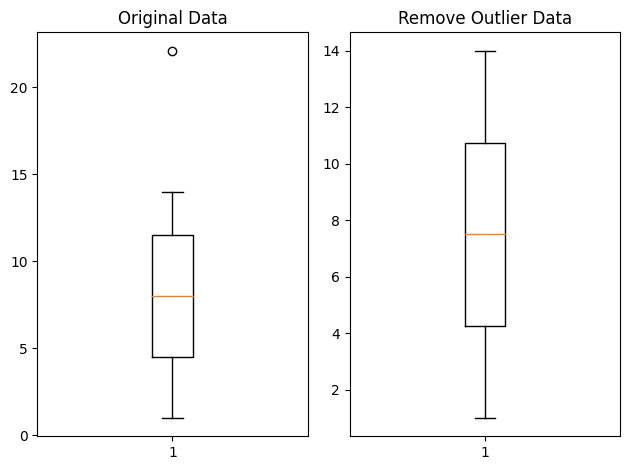

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)  # 1행 2열의 첫번째
fig_2 = fig.add_subplot(1,2,2)  # 1행 2열의 두번째

np.median(data)
np.percentile(data,25) # percentile() -> 사분위 계산해주는 함
np.percentile(data,75)

# IQR value -> 3사분위 - 1사분위
iqr_value = np.percentile(data,75) - np.percentile(data,25)
iqr_value

upper_fence = np.percentile(data,75) + 1.5 * iqr_value
upper_fence

lower_fence = np.percentile(data,25) - 1.5 * iqr_value
lower_fence

# 아하! 이렇게 tukey fence 방식을 사용하면 이상치를 구분하는
# 기준선을 알아낼 수 있어요!

# 내가 가지고 있는 데이터에 대해 이상치를 출력해보아요!
# boolean indexing을 사용해요
data[(data > upper_fence) | (data < lower_fence)]

# 데이터를 정제하는게 목적이에요. 이상치를 제거하는게 목적!
result_data = data[(data <= upper_fence) & (data >= lower_fence)]
result_data

fig_1.set_title('Original Data')
fig_1.boxplot(data)

fig_2.set_title('Remove Outlier Data')
fig_2.boxplot(result_data)

plt.tight_layout()
plt.show()

# 방법 2. 정규분포(z-score) 이용

In [ ]:
# 이 방식 이용하려면
# 기본적으로 우리 데이터를 정규분포 시켜서 우리 데이터에 대한
# z-score 값을 각각 구해야 해요!
# 그리고 기준치를 설정한 다음 그 기준치를 넘는 데이터를 이상치로 판별

from scipy import stats

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0  # 일반적으로 2.0 많이 사용
outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]  # abs 쓴 이유 -> 상위, 하위 이상치 모두 한번에 제거하기 위해

# 이상치들을 제거한 결과
data[np.isin(data,outlier,invert=True)]  #invert -> True는 False로, False는 True로 바꿔줌



array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

In [ ]:
# python, tensorflow, sklearn으로 구현을
# 이상치 제거한 데이터 이용해서 학습시키고 결과 그래프를 출력해보아요!
# 62도에서의 예측치도 구해보기!

In [ ]:
# 3가지 구현에 모두 쓸 수 있게 이상치 제거 해놓기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ozone.csv')
df

training_data = df[['Temp','Ozone']]

# 결측치 제거
training_data = training_data.dropna(how='any')

# 이상치 제거
zscore_threshold = 1.8
outlier = training_data['Ozone'][np.abs(stats.zscore(training_data['Ozone'].values)) > zscore_threshold]

# 이상치를 제거한 DataFrame으로 변경
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier,invert=True)]

# Traingin Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

In [ ]:
# Python 직접 구현

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   #  [0.0 0.0]

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)  # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Model을 만들어야 하는데.. y = Wx + b
W = np.random.rand(1,1)  # 어떤 값을 설정해야 하는지 모르기 때문에 처음에는 랜덤 값을 받는다
b = np.random.rand(1)

# loss function -> W와 b 값에 의해 결정되는 함수이므로 W,b가 들어와야 함
def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]

    y = np.dot(x_data,input_W) + input_b
    return np.mean(np.power((t_data-y),2))

# 모델이 완성된 후 예측하는 함수를 하나 만들어요!
def predict(x):
    return np.dot(x, W) + b

# learning rate 정의(hyperparameter -> 내가 정하는 것)
learning_rate = 1e-4  # 1e-4 -> learning_rate 설정하는 기준

# 학습진행
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')



W : [[0.51432522]], b : [0.43136965], loss : 547.6026962111084
W : [[0.62935993]], b : [-10.18858179], loss : 455.85182333320154
W : [[0.75327472]], b : [-19.91556818], loss : 424.28821475587216
W : [[0.86677305]], b : [-28.82488979], loss : 397.80813396437424
W : [[0.97073055]], b : [-36.98528073], loss : 375.59284520514575
W : [[1.06594922]], b : [-44.45969721], loss : 356.9554755360099
W : [[1.15316368]], b : [-51.30580325], loss : 341.31977743905134
W : [[1.23304675]], b : [-57.57641556], loss : 328.2023118675299
W : [[1.30621474]], b : [-63.31991097], loss : 317.1975008284924
W : [[1.37323212]], b : [-68.58059971], loss : 307.96508734556284


In [ ]:
# 학습종료 후 예측
# 온도가 62도일 때, ozone량은 얼마?
predict(np.array([[62]]))  # 2차원 배열 형태로 값이 들어가야 하기 때문

# 데이터를 2차원 평면에 찍어보아요
# plt.scatter(x_data,t_data)

# # 우리 Model을 그려보아요
# plt.plot(x_data, x_data*W.ravel() + b, color='r')

array([[15.54715239]])

In [ ]:
# 같은 내용을 이제 Tensorflow Keras를 이용해서 구현!

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Model 만들기
model = Sequential()

model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,
                     activation='linear')

model.add(output_layer)

# Model 설정
model.compile(optimizer=SGD(learning_rate=1e-4),
              loss='mse')

# Model
model.fit(x_data,
          t_data,
          epochs=2000,
          verbose=0)

In [ ]:
# 학습이 끝났으니 예측해보아요
print(model.predict(np.array([[62]])))

weight, bias = output_layer.get_weights()

1/1 [==============================] - 0s 28ms/step
[[27.974648]]


In [ ]:
# 정답(?)을 확인하기 위해 sklearn 구현을 해보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Model 생성
sklearn_model = linear_model.LinearRegression()

# Model 학습
sklearn_model.fit(x_data, t_data)

# W와 b를 알아야 그래프 그릴 수 있겠죠
weights = sklearn_model.coef_
bias = sklearn_model.intercept_

# 예측을 해보아요!
sklearn_model.predict(np.array([[62]]))


array([[4.51299041]])

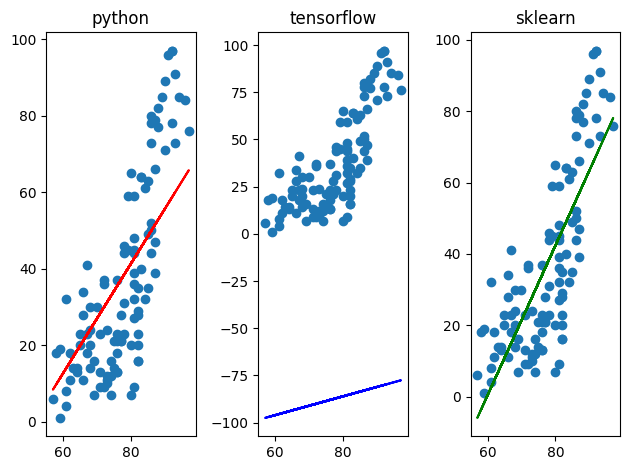

In [ ]:
# 결과를 그래프로 확인해보아요
fig = plt.figure()

fig_python = fig.add_subplot(1,3,1)
fig_tensorflow = fig.add_subplot(1,3,2)
fig_sklearn = fig.add_subplot(1,3,3)

fig_python.set_title('python')
fig_tensorflow.set_title('tensorflow')
fig_sklearn.set_title('sklearn')

fig_python.scatter(x_data,t_data)
fig_python.plot(x_data, x_data*W.ravel() + b, color='r')

fig_tensorflow.scatter(x_data,t_data)
fig_tensorflow.plot(x_data, x_data*weight + bias, color='b')

fig_sklearn.scatter(x_data,t_data)
fig_sklearn.plot(x_data, x_data*sklearn_model.coef_ + sklearn_model.intercept_,
                 color='g')

plt.tight_layout()
plt.show()